In [1]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os

from matplotlib.container import ErrorbarContainer
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

# hide warnigns for clarity
import warnings
warnings.filterwarnings('ignore')

from plotting_utils import *
# mpl.rc('text', usetex=True)


In [2]:
# config 

# path to data directory
path_dir = '../data/'


save_figs = False
save_folder = './figs/'


sim_envs = ['SwimmerEnv_v3_real2sim_rew500',
        'SwimmerEnv_v3_real2sim_H30',
        'SwimmerEnv_v3_real2sim_H30'
        ]

hw_envs = ['Swimmer_rew10',
        'Swimmer_H20',
        'Swimmer_H20'
       ]

ss_sim_envs = ['SwimmerEnv_v3_real2sim_rew500_ss',
        'SwimmerEnv_v3_real2sim_H30_ss',
        'SwimmerEnv_v3_real2sim_H30_ss'
        ]

ss_hw_envs = ['','','Swimmer_H20_ss']

methods = ['sac_orig','mppi','maxdiff'] 
plot_legend = ['SAC','NN-MPPI','MaxDiff'] 

hw_txt=r' Hardware '
ss_txt=r'Single-shot'
sim_txt=r' Simulation '
ms_txt = r'Multi-shot'

def get_colors(num_colors=31):
    colors = {}
    colors['sac_orig'] = sns.color_palette("Blues_r",n_colors=num_colors+10)
    colors['mppi'] = sns.color_palette("Greens_r",n_colors=num_colors+10)
    colors['maxdiff'] = sns.color_palette('rocket',n_colors=num_colors)
    return colors

              
if save_figs and os.path.exists(save_folder):
    os.make_dirs(save_folder)

# multishot

## rewards

[17.4 23.2 26.1]


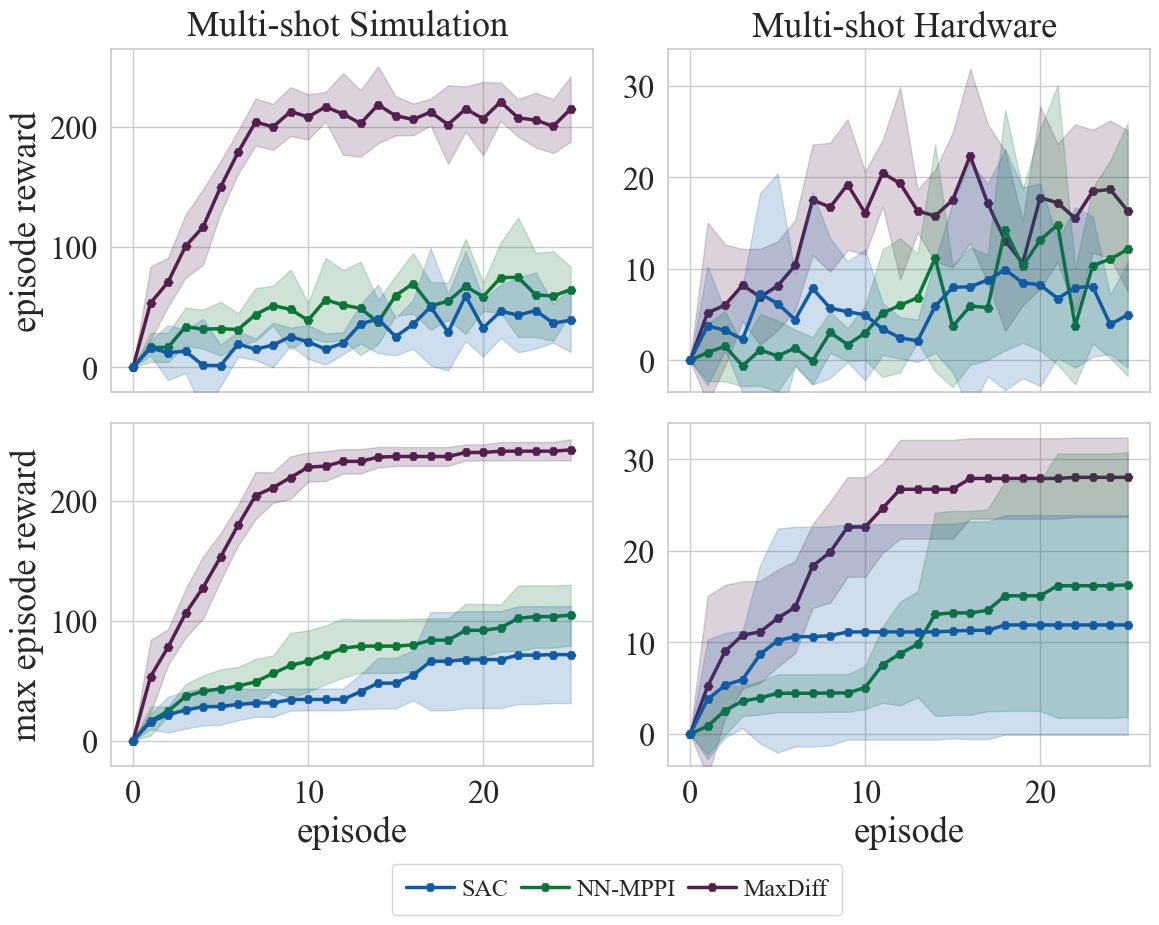

In [3]:
setup_formatting(4)
fig, axss = plt.subplots( 2, 2, figsize=(12,9) ,sharey='col') #, gridspec_kw={'width_ratios': [3,3,1.75]},sharex='col')

fill = True
use_ep = True
data_file = 'reward_data.pkl'
data_type = 'train'

for ax,envs,hw,ylims in zip(axss.T,[sim_envs,hw_envs],[False,True],[[-21,265],[-3.5,34]]):
    for axs, plot_max in zip(ax,[False, True]):
        colors = get_colors()
        for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
            data_path = '{}/{}/'.format(path_dir+method, env)
            try:
                data = process_data(data_path,N=26,get_max=plot_max,data_file=data_file)
                plot_data(axs, data, lgd,color=colors[method][6],fill=fill,zorder=10-env_idx,linewidth=2.5,marker='H',use_ep=use_ep)
                axs.tick_params(axis='both', which='major')
                # print(data_path, len(data['raw_data']))
            except:
                pass
        if not hw:
            if plot_max:
                axs.set_ylabel( 'max episode reward' )
            else:
                axs.set_ylabel( 'episode reward' )

    plt.setp(ax[0].get_xticklabels(),visible=False)
    if hw:
        ax[0].set_title(ms_txt + hw_txt,pad=10)
    else:
        ax[0].set_title(ms_txt + sim_txt,pad=10)
        # ax[0].set_yticks(ticks = np.linspace(0,250,6) )
    ax[1].set_xlabel( 'episode')
    axs.set_ylim(*ylims)

fig.tight_layout(pad=1.25)

# ax[1].legend(bbox_to_anchor=(-.12,-.2), loc="upper center", ncol=3, handletextpad=0.3, columnspacing=0.5,borderpad=0.6 )
axss[1,0].legend(bbox_to_anchor=(1.05,-.25), loc="upper center", ncol=3, handletextpad=0.3, columnspacing=0.5,borderpad=0.6 )

if save_figs:
    title = 'multishot_rewards'
    plt.savefig(f'{save_folder}{title}.pdf', bbox_inches='tight')


## paths

[12.6 16.8 18.9]
../data/mppi/Swimmer_H20/seed_113/ 14


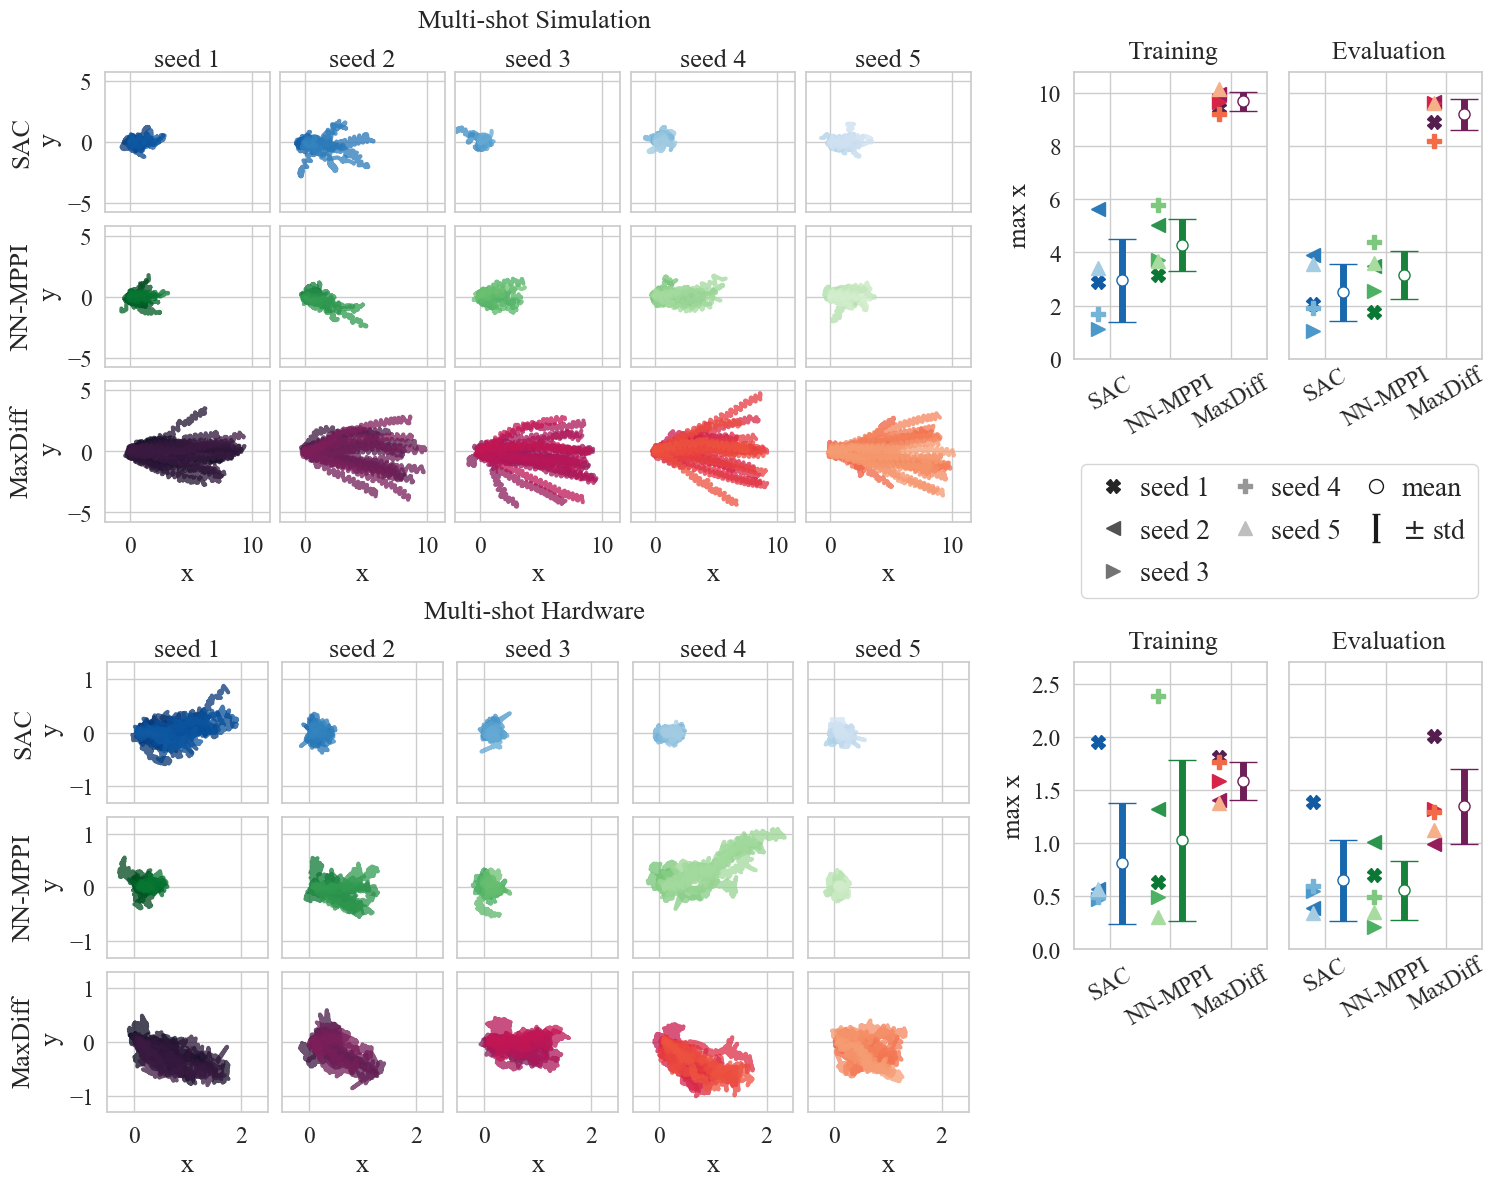

In [4]:
setup_formatting(3)

fig = plt.figure(figsize=(16,12))
gs0 = gridspec.GridSpec(2, 3, figure=fig, width_ratios=[4.5,1,1])
gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[2])
gs2 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[5])
ax_eval = [fig.add_subplot(gs1[:2]),fig.add_subplot(gs2[:2])]

data_file = 'buffer_data_enjoy_full.pkl'
num_colors2 = 31
colors = get_colors()

for ax,envs, hw, ylim in zip(ax_eval,[sim_envs,hw_envs],[False,True],[[0,10.8],[0,2.7]]):
    for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
        data_path = '{}/{}/'.format(path_dir+method, env)
        if hw: 
            reward_scale = 10. if lgd == 'SAC' else 1
            rew_idx = 13
        else:
            reward_scale = 500. if lgd == 'SAC' else 1.
            rew_idx = 13
        try:
            seeds,data = load_final_data_alt(data_path,max_x=True,data_file=data_file)
            ax.errorbar(env_idx+0.5, np.mean(data), np.std(data), marker='o', zorder=10, color=colors[method][8],capsize=10, elinewidth=5, ms=8, markerfacecolor='w')
            color = colors[method][len(data)+1::5][:len(data)]
            for d,x,m,c in zip(data,env_idx*np.ones(len(data)),['X','<','>','P','^'],color):  
                ax.plot(x,d,marker=m,color=c,ms=10)
            ax.tick_params(axis='both', which='major')
        except: 
            pass    

    axs = ax
    axs.set_xticks(ticks = np.arange(len(plot_legend))+0.2,labels=plot_legend,rotation=30)
    axs.set_xlim(-.4,2.8)
    plt.setp(ax.get_yticklabels(), visible=False)
    axs.set_ylim(*ylim)
    
    # update ticks to labels
    axs.tick_params(axis='x', which='major',length=0)
    axs.xaxis.tick_bottom()
    axs.set_title(r' Evaluation',pad=10)


data_file = 'buffer_data.pkl'
num_colors = 31*5


    
gs00 = gridspec.GridSpecFromSubplotSpec(3, 5, subplot_spec=gs0[0],wspace=0.05, hspace=0.1)
gs10 = gridspec.GridSpecFromSubplotSpec(3, 5, subplot_spec=gs0[3],wspace=0.05, hspace=0.1)
ax_titles = []

for gs, envs, hw in zip([gs00,gs10],[sim_envs,hw_envs],[False,True]):
    colors = {}
    colors['sac_orig'] = iter(sns.color_palette("Blues_r",n_colors=num_colors))
    colors['mppi'] = iter(sns.color_palette("Greens_r",n_colors=num_colors))
    colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=num_colors))

    
    ax1 = None
    offset = 0
    for seed_idx,seed in enumerate(range(13,500,100)):

        for method_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
            data_path = '{}/{}/seed_{}/'.format(path_dir+method, env,seed)
            try:
                with open(data_path+data_file,'rb') as f: 
                    buff = pickle.load(f)
                max_buff = (np.floor(buff.shape[0]/1000)*1000).astype(int)
                x = buff[:max_buff,0].reshape(-1,1000)
                y = buff[:max_buff,1].reshape(-1,1000)
                old_t = np.arange(0,1000)
                t = np.arange(0,1000,5)
                # get data before adding subplot
                if ax1 is None:
                    ax = fig.add_subplot(gs[method_idx-offset,seed_idx])
                    ax1 = ax
                else:
                    ax = fig.add_subplot(gs[method_idx-offset,seed_idx],sharex=ax1,sharey=ax1)       
                for xt,yt in zip(x,y): 
                    if hw and any (yt < -2): 
                        pass
                        print(data_path, sum(yt<-1))
                    else:
                        xtemp = np.interp(t,old_t,xt)
                        ytemp = np.interp(t,old_t,yt)
                        color = next(colors[method])
                        ax.plot(xtemp,ytemp,lw=3,color=color,alpha=0.75)
                        # ax[-1,method_idx-offset].plot(xtemp,ytemp,lw=3,color=color,alpha=0.75) # all
                if seed_idx == 0: 
                    ax.set_ylabel(f'{lgd}\n y')
                else: 
                    plt.setp(ax.get_yticklabels(), visible=False)
                if method_idx == 0 :
                    if seed_idx == 2: 
                        if hw: 
                            ax.set_title( ms_txt + hw_txt,pad=15)
                        else: 
                            ax.set_title(ms_txt + sim_txt,pad=15)
                        ax_titles.append(ax)
                    
                    ax.xaxis.set_label_position('top') 
                    ax.set_xlabel(f'seed {seed_idx+1}')
                if method_idx == 2:  # 5 for all
                    ax.set_xlabel(f'x')
                else: 
                    plt.setp(ax.get_xticklabels(),visible=False)
            except:
                if seed_idx == 0:
                    offset +=1
                pass
            ax.set_aspect('equal')

    lims = np.max(np.abs(ax.get_ylim()))*1.1
    ax.set_ylim(-lims,lims)
    if hw: 
        ax.set_xlim(-0.5, 2.5)
    else:
        ax.set_xlim(-2, 11.5)
    # print(ax.get_xlim())

gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1])
gs11 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[4])

colors = get_colors()
ax = []

for gs, envs, hw, ylim in zip([gs01,gs11],[sim_envs,hw_envs],[False,True],[[0,10.8],[0,2.7]]):
    axs = fig.add_subplot(gs[:-1])
    ax.append(axs)
    for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
        try:
            data_path = '{}/{}/'.format(path_dir+method, env)
            seeds,data = load_final_data_alt(data_path,max_x=True,data_file=data_file)
            axs.errorbar(env_idx+0.4, np.mean(data), np.std(data), marker='o', zorder=10, color=colors[method][8],capsize=10, elinewidth=5, ms=8, markerfacecolor='w')
            color = colors[method][len(data)+1::5][:len(data)]
            for d,x,m,c in zip(data,env_idx*np.ones(len(data)),['X','<','>','P','^'],color):  # +np.arange(len(data))*0.035-0.09
                axs.plot(x,d,marker=m,color=c,ms=10)
            axs.tick_params(axis='both', which='major')
        except:
            pass

    axs.set_ylabel('max x')
    axs.set_title(r' Training',pad=10)

    axs.set_ylim(*ylim)
    axs.set_xlim(-.4,2.8)
    axs.set_xticks(ticks = np.arange(len(plot_legend))+0.2,labels=plot_legend,rotation=30)
           
fig.tight_layout()

for ax in ax_eval: 
    box = ax.get_position()
    box.x0 = box.x0 - 0.05
    box.x1 = box.x1 - 0.05
    ax.set_position(box)

circ = Line2D([],[], ls="none", marker='o',color='k', ms=8)
filled = Line2D([],[], ls="none", marker='d',color='k', ms=8)
opened = Line2D([],[], ls="none", marker='o',color='k', ms=10, markerfacecolor='w')
line = Line2D([],[], ls="none",color='k')
barline = LineCollection(np.empty((2,2,2)),color='k',lw=3)
err = ErrorbarContainer((line, [line], [barline]), has_xerr=False, has_yerr=True)
handles =[ Line2D([],[], ls="none", marker=m,color=c, ms=10) for m,c in zip(['X','<','>','P','^'],sns.color_palette('Greys_r',n_colors=7))]

ax_eval[0].legend(handles=handles+[opened,err], labels=[f"seed {s}" for s in range(1,6)]+['mean',r'$\pm$ std'], handletextpad=0.2,handlelength=1.5,loc="center",bbox_to_anchor=(-0.05,-0.6),labelspacing=0.6,fontsize=20,ncol=3,columnspacing=0.5)

if save_figs:
    title = 'multishot_paths'
    plt.savefig(f'{save_folder}{title}.pdf', bbox_inches='tight')

## eval

[17.4 23.2 26.1]
['seeds: 5', 'iters: 5', '../data/sac_orig/SwimmerEnv_v3_real2sim_rew500/']
['seeds: 5', 'iters: 5', '../data/mppi/SwimmerEnv_v3_real2sim_H30/']
['seeds: 5', 'iters: 5', '../data/maxdiff/SwimmerEnv_v3_real2sim_H30/']
['seeds: 5', 'iters: 5', '../data/sac_orig/Swimmer_rew10/']
['seeds: 5', 'iters: 5', '../data/mppi/Swimmer_H20/']
['seeds: 5', 'iters: 5', '../data/maxdiff/Swimmer_H20/']


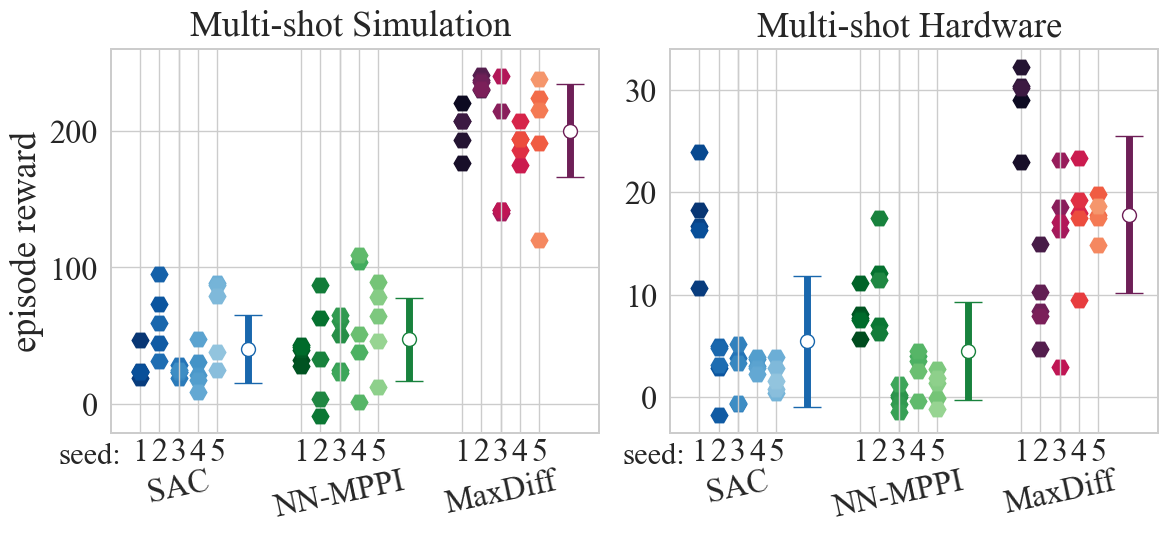

In [5]:
setup_formatting(4)
data_file = 'buffer_data_enjoy_full.pkl'

fig, axx = plt.subplots( 1, 2, figsize=(12,5.7),sharex='row' ) #, gridspec_kw={'width_ratios': [2,1.7]})
colors = get_colors()

for ax,envs, hw, ylim in zip(axx.T,[sim_envs,hw_envs],[False,True],[[-21,260],[-3.5,34]]): 
    ticks = []
    tick_labels = []
    for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
        data_path = '{}/{}/'.format(path_dir+method, env)
        if hw: 
            reward_scale = 10. if lgd == 'SAC' else 1
            rew_idx = 13
        else:
            reward_scale = 500. if lgd == 'SAC' else 1.
            rew_idx = 13
        try:
            seeds,data = load_rew_buff(deata_path,data_file=data_file,reward_scale =reward_scale,rew_idx=rew_idx)
            ax.errorbar(env_idx+0.4, data['mean'], data['std'], marker='o',color=colors[method][8],capsize=10, elinewidth=5, ms=10, markerfacecolor='w')
            for idx,d in enumerate(data['data'].reshape(5,-1)):
                color = colors[method][idx*5:idx*5+len(d)]
                for x,dd,c,m in zip(env_idx*np.ones(len(d))+0.12*idx-0.27,d,color,['X','<','>','P','^']):
                    ax.plot(x,dd,marker='H',color=c,ms=12)
                ticks += [env_idx+0.12*idx-0.27]
                if idx == 0 and not hw: 
                    tick_labels +=  [idx+1] # [f'{idx+1} \n seed ']
                else:
                    tick_labels += [idx+1]
        except: 
            pass
                
    axs = ax
    axs.set_xlim(-.45,2.58)
    axs.get_xticklabels([])
    if hw: 
        axs.set_title(ms_txt + hw_txt,pad=10)
    else:
        ax.set_ylabel('episode reward')
        axs.set_title(ms_txt + sim_txt,pad=10)
    
    axs.set_ylim(*ylim)
    # update ticks to labels
    axs.tick_params(axis='x', which='major',length=0)
    axs.xaxis.tick_bottom()
    ax.set_xticks(ticks = ticks,labels=tick_labels)
    
    ax2 = ax.twiny()
    ax2.set_xlim(-.45,2.58)
    ax2.tick_params(axis='x', which='major',length=0)
    ax2.xaxis.tick_bottom()
    ax2.set_xticks(ticks = np.arange(len(plot_legend))+0.12*2-0.27,labels=plot_legend,rotation=12,y=-0.075)
    
    
fig.tight_layout()

plt.figtext(0.062,0.158,'seed:',fontsize=22)
plt.figtext(0.532,0.158,'seed:',fontsize=22)
    
if save_figs:
    title = 'fig4'
    plt.savefig(f'{save_folder}{title}.pdf', bbox_inches='tight')
plt.show()

# singleshot combo

[17.4 23.2 26.1]
../data/maxdiff/Swimmer_H20_ss/seed_13/ 6006.0


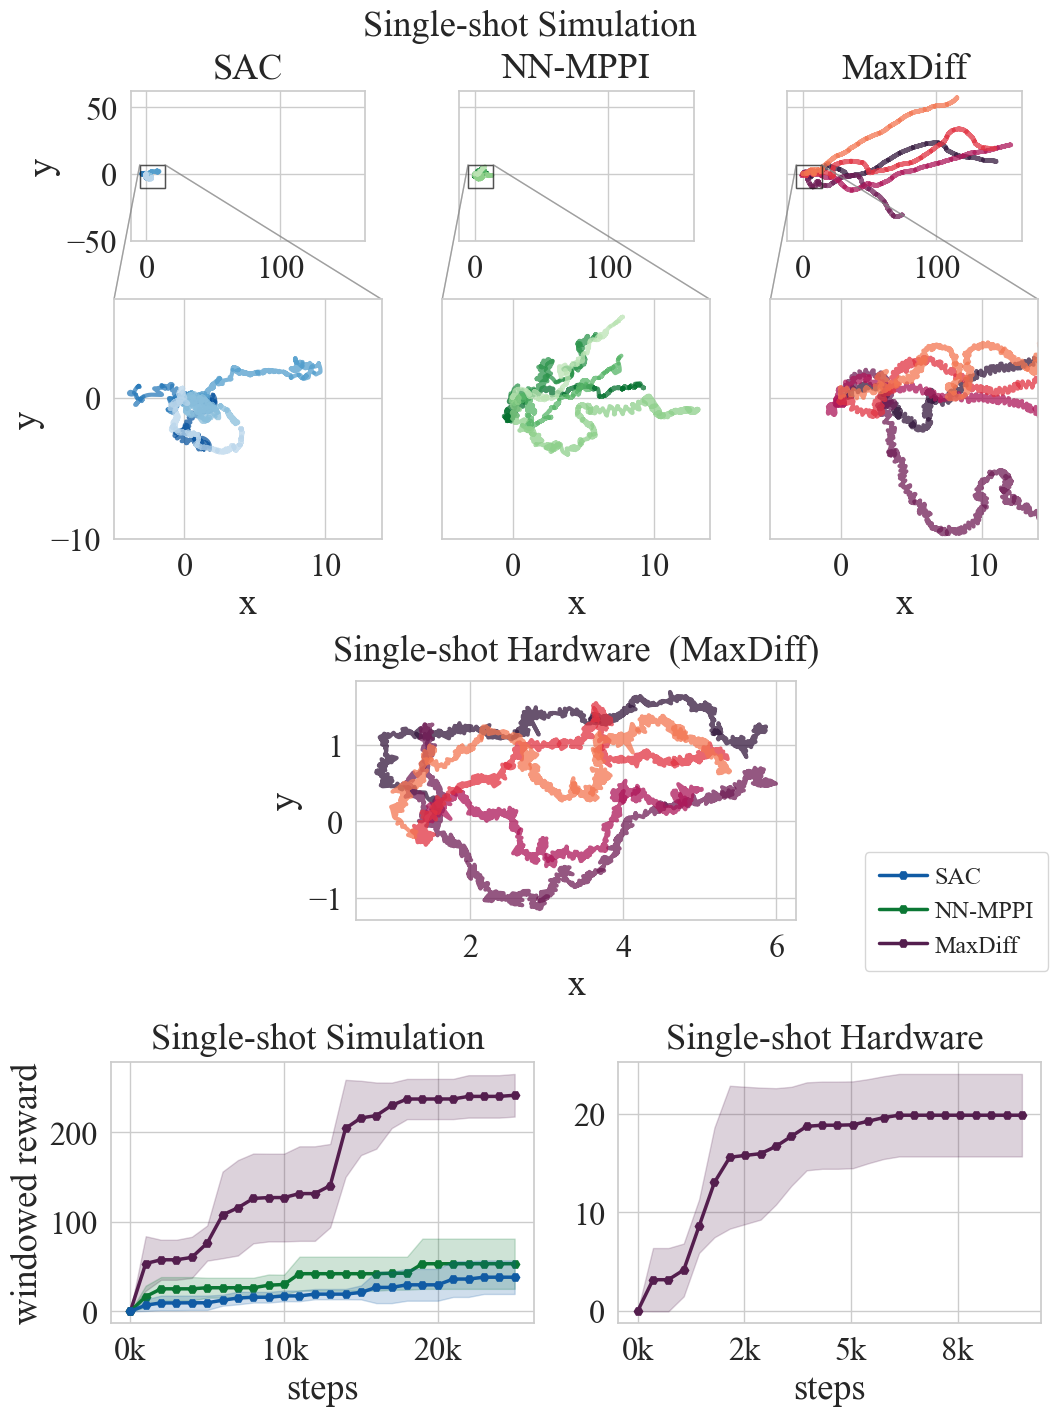

In [6]:
setup_formatting(4)

fig = plt.figure(figsize=(12,11+5))
gs0 = gridspec.GridSpec(3, 1, figure=fig, height_ratios = [3.,1.6,1.75],hspace=0.45)

data_file = 'buffer_data.pkl'
num_colors = 6 # 31*5

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0],height_ratios=[1.25,2],hspace=0.3)
gs20 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs0[1])

hw_ax = []
hw_axx = []
ax_titles = []

for gs, envs, hw in zip([gs00,gs20],[ss_sim_envs,ss_hw_envs],[False,True]):
    colors = {}
    colors['sac_orig'] = iter(sns.color_palette("Blues_r",n_colors=num_colors))
    colors['mppi'] = iter(sns.color_palette("Greens_r",n_colors=num_colors))
    colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=num_colors))

    ax1 = None
    ax2 = None
    offset = 0
    for method_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):

        for seed_idx,seed in enumerate(range(13,500,100)):
            color = next(colors[method])
    
            data_path = '{}/{}/seed_{}/'.format(path_dir+method, env,seed)
            try:
                with open(data_path+data_file,'rb') as f: 
                    buff = pickle.load(f)
                max_buff = (np.floor(buff.shape[0]/1000)*1000).astype(int)
                x = buff[:max_buff,0].reshape(-1,1000)
                y = buff[:max_buff,1].reshape(-1,1000)
                old_t = np.arange(0,1000)
                t = np.arange(0,1000,5)
                # get data before adding subplot
                if seed_idx == 0:
                    if ax1 is None:
                        ax = fig.add_subplot(gs[0,method_idx-offset])
                        ax1 = ax
                    else:
                        ax = fig.add_subplot(gs[0,method_idx-offset],sharex=ax1,sharey=ax1)     
                    if not hw: 
                        hw_ax.append(ax)
                        if ax2 is None: 
                            axx = fig.add_subplot(gs[1,method_idx-offset])
                            ax2 = axx
                        else: 
                            axx = fig.add_subplot(gs[1,method_idx-offset],sharex=ax2,sharey=ax2)     
                        hw_axx.append(axx)
                for xt,yt in zip(x,y): 
                    if hw and any (yt < -2): 
                        pass
                        print(data_path, sum(yt<-1))
                    else:
                        xtemp = np.interp(t,old_t,xt)
                        ytemp = np.interp(t,old_t,yt)
                        ax.plot(xtemp,ytemp,lw=3,color=color,alpha=0.75)
                        if not hw: 
                            axx.plot(xtemp,ytemp,lw=3,color=color,alpha=0.75)

                if not hw:
                    if method_idx == 0:                    
                        ax.set_ylabel('y')
                        axx.set_ylabel('y')
                    else: 
                        plt.setp(ax.get_yticklabels(),visible=False)
                        plt.setp(axx.get_yticklabels(),visible=False)
                if seed_idx == 0:  # 5 for all
                    if hw: 
                        ax.set_title(ss_txt+hw_txt+' ('+lgd+')',pad=15)
                        ax.set_xlabel(f'x')
                        ax.set_ylabel('y')
                    else:
                        ax.set_title(lgd,pad=10)
                        axx.set_xlabel(f'x')

            except:
                if seed_idx == 0:
                    offset +=1
                pass
            ax.set_aspect('equal')
            axx.set_aspect('equal')
    if not hw:
        ax.set_ylim(-50,ax.get_ylim()[1])
    axx.set_xlim(-5,14)
    axx.set_ylim(-10,7)
    for ax, axx in zip(hw_ax,hw_axx): 
        rect, lines = ax.indicate_inset_zoom(axx)
        rect.set_edgecolor('k')

        

gs1 = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs0[2])
axss = [fig.add_subplot(gs1[0]),fig.add_subplot(gs1[1])]

fill = True
use_ep = False
data_file = 'reward_data.pkl'
data_type = 'train'

plot_max = True 

for axs, envs, hw,ylims in zip(axss,[ss_sim_envs,ss_hw_envs],[False,True],[[-21,265],[-3.5,34]]):
    colors = get_colors()
    for env_idx,(env,method,lgd) in enumerate(zip(envs,methods,plot_legend)):
        data_path = '{}/{}/'.format(path_dir+method, env)
        try:
            data = process_data_alt(data_path,N=26,get_max=plot_max,data_file=data_file)
            plot_data(axs, data, lgd,color=colors[method][6],fill=fill,zorder=10-env_idx,linewidth=2.5,marker='H',use_ep=use_ep)
            axs.tick_params(axis='both', which='major')
            xlabels = ['{:,.0f}'.format(x) + 'k' for x in axs.get_xticks()/1000]
            axs.set_xticklabels(xlabels)
        except:
            pass
        if not hw: 
            axs.set_ylabel( 'windowed reward' )

    axs.set_xlabel( 'steps')

    if hw:
        axs.set_title(ss_txt + hw_txt,pad=10)
    else:
        axs.set_title(ss_txt + sim_txt,pad=10)


axss[0].legend(bbox_to_anchor=(2,1.85), loc="upper center", ncol=1, handletextpad=0.3, columnspacing=0.5,borderpad=0.6 )


plt.figtext(0.335,0.915,ss_txt + sim_txt,fontsize=26.1)

if save_figs:
    title = 'singleshot_combo'
    plt.savefig(f'{save_folder}{title}.pdf', bbox_inches='tight')
    